In [17]:
##1st script to select best ml model
import pandas as pd
#models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.neural_network import MLPClassifier #NN
#Emsemble model
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
#training and testing selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# To ignore all external warnings coming from libraries
import warnings
warnings.filterwarnings("ignore")

# Load the CSV file as a Pandas DataFrame (file from NHANES database)
data = pd.read_csv('Health_And_Nutrition_BmiClass.csv') #training set

# Use LabelEncoder to transform 'Gender' and 'Ethnicity' to numerical values
le_gender = LabelEncoder()
le_ethnicity = LabelEncoder()

data['Gender'] = le_gender.fit_transform(data['Gender'])
data['Ethnicity'] = le_ethnicity.fit_transform(data['Ethnicity'])

# Divide the DataFrame into features and labels
X = data[['Age', 'Gender', 'Ethnicity', 'Height', 'Weight']] #adapt accordingly: depending on parameters to analyze
y = data['BMI_Code']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create a list of models
models = [
    ('decision_tree', DecisionTreeClassifier()),
    ('k_neighbors', KNeighborsClassifier(n_neighbors=5)),
    ('svr', SVC()),
    ('mlp_classifier', MLPClassifier()),#NN
    ('linear_regression', LogisticRegression()), ('ridge_regression', RidgeClassifier())
]

# Train individual models
for name, model in models:
    model.fit(X_train, y_train)

# Create ensemble models
vc_model = VotingClassifier([(name, model) for name, model in models])
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()

# Train multiple ensemble models
vc_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Open the output CSV file for writing
with open('outputClassificationModelsAGEth.csv', 'w') as w:
    # Write the header to the CSV file
    w.write('Index,Age,Gender,Ethnicity,Height,Weight,Bmi_Code,DecisionTree,KNeighbors,SVR,NeuralNetwork,LogisticRegression,RidgeClassifier,Voting,RandomForest,GradientBoosting\n')

    # Initialize a counter for printed values
    printed_count = 0
    
    # Loop through rows in the values.csv file
    for index, row in X_test.iterrows(): #testing output size
        # Unpack values from the row. Adapt accordingly: depending on parameters to analyze
        age, gender, eth, height, weight, bmiC = row['Age'], row['Gender'], row['Ethnicity'], row['Height'], row['Weight'], y_test[index]

    # Make predictions with the models
        Bmi1 = models[0][1].predict([[age, gender, eth, height, weight]])
        Bmi2 = models[1][1].predict([[age, gender, eth, height, weight]])
        Bmi3 = models[2][1].predict([[age, gender, eth, height, weight]])
        Bmi4 = models[3][1].predict([[age, gender, eth, height, weight]])
        Bmi5 = models[4][1].predict([[age, gender, eth, height, weight]])
        Bmi6 = models[5][1].predict([[age, gender, eth, height, weight]])
    
        #ensemblers predictions
        Bmi_predicha_vc = vc_model.predict([[age, gender, eth, height, weight]])
        Bmi_predicha_rf = rf_model.predict([[age, gender, eth, height, weight]])
        Bmi_predicha_gb = gb_model.predict([[age, gender, eth, height, weight]])

        # Write all the results to the CSV file
        w.write(f'{index},{age},{gender},{eth},{height},{weight},{bmiC},{Bmi1[0]},{Bmi3[0]},{Bmi4[0]},{Bmi5[0]},{Bmi2[0]},{Bmi6[0]},{Bmi_predicha_vc[0]},{Bmi_predicha_rf[0]},{Bmi_predicha_gb[0]}\n')

        # Increment the counter
        printed_count += 1
        
        # Print the results if the condition is met, short list
        if printed_count <= 10:
        # Print the results
            print(f'{index},{age},{gender},{eth},{bmiC},DecisionTree {Bmi1[0]},'
              f'KNeighbors {Bmi3[0]},SupportVector {Bmi4[0]},NeuralNetwork {Bmi5[0]},'
              f'LinearRegression {Bmi2[0]},RidgeRegression {Bmi6[0]},Voting {Bmi_predicha_vc[0]}, RandomForest {Bmi_predicha_rf[0]}, GradientBoosting {Bmi_predicha_gb[0]}')

5436,66.0,1.0,4.0,2,DecisionTree 2,KNeighbors 2,SupportVector 2,NeuralNetwork 2,LinearRegression 2,RidgeRegression 2,Voting 2, RandomForest 2, GradientBoosting 2
5102,43.0,0.0,4.0,1,DecisionTree 1,KNeighbors 1,SupportVector 1,NeuralNetwork 1,LinearRegression 1,RidgeRegression 0,Voting 1, RandomForest 1, GradientBoosting 1
3694,48.0,1.0,3.0,2,DecisionTree 2,KNeighbors 2,SupportVector 2,NeuralNetwork 2,LinearRegression 2,RidgeRegression 2,Voting 2, RandomForest 2, GradientBoosting 2
1499,41.0,0.0,0.0,0,DecisionTree 0,KNeighbors 0,SupportVector 0,NeuralNetwork 0,LinearRegression 0,RidgeRegression 0,Voting 0, RandomForest 0, GradientBoosting 0
2698,76.0,0.0,0.0,2,DecisionTree 2,KNeighbors 2,SupportVector 2,NeuralNetwork 2,LinearRegression 2,RidgeRegression 2,Voting 2, RandomForest 2, GradientBoosting 2
4108,35.0,1.0,0.0,2,DecisionTree 2,KNeighbors 2,SupportVector 2,NeuralNetwork 2,LinearRegression 2,RidgeRegression 2,Voting 2, RandomForest 2, GradientBoosting 2
1032,25.0,0.0,2.0,2,Decision

In [18]:
##2nd script to produce stats (Accuracy,Precision,Recall,F1-score, etc) for model selection
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, auc, fbeta_score, balanced_accuracy_score, matthews_corrcoef, cohen_kappa_score
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Initialize empty lists to store metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
precision_recall_auc_list = []
fbeta_list = []
balanced_accuracy_list = []
mcc_list = []
kappa_list = []

# Read data from input file
input_file = 'outputClassificationModelsAGEth.csv'  # Replace with your actual file path
df = pd.read_csv(input_file)  # Assuming tab-separated data

columns_to_compare = ['DecisionTree', 'KNeighbors', 'SVR', 'NeuralNetwork', 'LogisticRegression', 'RidgeClassifier', 'Voting', 'RandomForest', 'GradientBoosting']

# Evaluate classification metrics for each model
for model in columns_to_compare:
    # Choose an appropriate threshold based on your data characteristics
    threshold = 0.0  # Adjust this threshold, e.g., 0.0 for bmi normal

    y_true = (df['Bmi_Code'] >= threshold).astype(int)
    y_pred = (df[model] >= threshold).astype(int)

    # Calculate classification metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    # Precision-Recall Curve and AUC-PR
    precision_curve, recall_curve, _ = precision_recall_curve(y_true, y_pred)
    auc_pr = auc(recall_curve, precision_curve)

    # F-beta Score
    beta = 1.0  # Adjust this value based on the importance of precision vs. recall
    fbeta = fbeta_score(y_true, y_pred, beta=beta, average='weighted', zero_division=0)

    # Balanced Accuracy
    balanced_acc = balanced_accuracy_score(y_true, y_pred)

    # Matthews Correlation Coefficient (MCC)
    mcc = matthews_corrcoef(y_true, y_pred)

    # Cohen's Kappa
    kappa = cohen_kappa_score(y_true, y_pred)

    # Append metrics to lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    precision_recall_auc_list.append(auc_pr)
    fbeta_list.append(fbeta)
    balanced_accuracy_list.append(balanced_acc)
    mcc_list.append(mcc)
    kappa_list.append(kappa)

# Print and write metrics to output file
output_file = 'StatsClassificationModelsAGEth2.csv'  # Replace with your desired output file path
with open(output_file, 'w') as w:
    w.write('Model,Accuracy,Precision,Recall,F1-score,Precision-Recall AUC,F-beta,Balanced Accuracy,MCC,Cohen\'s Kappa\n')
    for i, model in enumerate(columns_to_compare):
        w.write(f'{model},{accuracy_list[i]:.4f},{precision_list[i]:.4f},{recall_list[i]:.4f},{f1_list[i]:.4f},{precision_recall_auc_list[i]:.4f},{fbeta_list[i]:.4f},{balanced_accuracy_list[i]:.4f},{mcc_list[i]:.4f},{kappa_list[i]:.4f}\n')

# Display metrics
print('Model\tAccuracy\tPrecision\tRecall\tF1-score\tPrecision-Recall AUC\tF-beta\tBalanced Accuracy\tMCC\tCohen\'s Kappa')
for i, model in enumerate(columns_to_compare):
    print(f'{model}\t{accuracy_list[i]:.4f}\t{precision_list[i]:.4f}\t{recall_list[i]:.4f}\t{f1_list[i]:.4f}\t{precision_recall_auc_list[i]:.4f}\t{fbeta_list[i]:.4f}\t{balanced_accuracy_list[i]:.4f}\t{mcc_list[i]:.4f}\t{kappa_list[i]:.4f}')

Model	Accuracy	Precision	Recall	F1-score	Precision-Recall AUC	F-beta	Balanced Accuracy	MCC	Cohen's Kappa
DecisionTree	0.9947	0.9945	0.9947	0.9946	0.9982	0.9946	0.8880	0.8223	0.8209
KNeighbors	0.9841	0.9685	0.9841	0.9763	0.9921	0.9763	0.5000	0.0000	0.0000
SVR	0.9947	0.9947	0.9947	0.9942	0.9973	0.9942	0.8333	0.8143	0.7974
NeuralNetwork	0.9912	0.9917	0.9912	0.9914	0.9982	0.9914	0.8862	0.7334	0.7324
LogisticRegression	0.9912	0.9913	0.9912	0.9895	0.9956	0.9895	0.7222	0.6637	0.6116
RidgeClassifier	0.9841	0.9685	0.9841	0.9763	0.9921	0.9763	0.5000	0.0000	0.0000
Voting	0.9947	0.9947	0.9947	0.9942	0.9973	0.9942	0.8333	0.8143	0.7974
RandomForest	0.9912	0.9913	0.9912	0.9895	0.9956	0.9895	0.7222	0.6637	0.6116
GradientBoosting	0.9982	0.9982	0.9982	0.9982	0.9991	0.9982	0.9444	0.9420	0.9403


In [19]:
##3rd script to checks every bmi class's stats (Accuracy,Precision,Recall,F1-score, etc) for model selection
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, auc, fbeta_score, balanced_accuracy_score, matthews_corrcoef, cohen_kappa_score
import pandas as pd

# Read data from input file
input_file = 'outputClassificationModelsAGEth.csv'  # Replace with your actual file path
df = pd.read_csv(input_file)  # Assuming tab-separated data

# Initialize empty lists to store metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
precision_recall_auc_list = []
fbeta_list = []
balanced_accuracy_list = []
mcc_list = []
kappa_list = []

# Display metrics
print('GradientBoosting Results:\nAccuracy\tPrecision\tRecall\tF1-score\tPrecision-Recall AUC\tF-beta\tBalanced Accuracy\tMCC\tCohen\'s Kappa')

for bmi_class in [-1, 0, 1, 2]:

    # Create binary labels for the current BMI class
    y_true = (df['Bmi_Code'] == bmi_class).astype(int)
    y_pred = (df['GradientBoosting'] == bmi_class).astype(int) 

    #remote empty cells/rows
    nan_indices = y_true.index[y_true.isna()]
    # Example of imputing NaN values with the mean
    y_true.fillna(y_true.mean(), inplace=True)
    # Alternatively, remove rows with NaN values
    y_true.dropna(inplace=True)
    
    y_pred.fillna(y_pred.mean(), inplace=True)
    y_pred.dropna(inplace=True)

    # Calculate classification metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    # Precision-Recall Curve and AUC-PR
    precision_curve, recall_curve, _ = precision_recall_curve(y_true, y_pred)
    auc_pr = auc(recall_curve, precision_curve)

    # F-beta Score
    beta = 1.0  # You can adjust this value based on the importance of precision vs. recall
    fbeta = fbeta_score(y_true, y_pred, beta=beta, average='weighted', zero_division=0)

    # Balanced Accuracy
    balanced_acc = balanced_accuracy_score(y_true, y_pred)

    # Matthews Correlation Coefficient (MCC)
    mcc = matthews_corrcoef(y_true, y_pred)

    # Cohen's Kappa
    kappa = cohen_kappa_score(y_true, y_pred)

    # Print intermediate results
    print(f'Class: {bmi_class}') # (Threshold: {threshold})')
    print(f'{accuracy:.4f}\t{precision:.4f}\t{recall:.4f}\t{f1:.4f}\t{auc_pr:.4f}\t{fbeta:.4f}\t{balanced_acc:.4f}\t{mcc:.4f}\t{kappa:.4f}\n')
    # Print and write metrics to output file
    output_file = 'StatsClassificationModelsAGEth2.csv'  # Replace with your desired output file path
    
    with open(output_file, 'a') as w:
        w.write('BMI_Class,Accuracy,Precision,Recall,F1-score,Precision-Recall AUC,F-beta,Balanced Accuracy,MCC,Cohen\'s Kappa\n')
        w.write(f'{bmi_class},{accuracy:.4f},{precision:.4f},{recall:.4f},{f1:.4f},{auc_pr:.4f},{fbeta:.4f},{balanced_acc:.4f},{mcc:.4f},{kappa:.4f}\n')

GradientBoosting Results:
Accuracy	Precision	Recall	F1-score	Precision-Recall AUC	F-beta	Balanced Accuracy	MCC	Cohen's Kappa
Class: -1
0.9982	0.9982	0.9982	0.9982	0.9453	0.9982	0.9444	0.9420	0.9403

Class: 0
0.9824	0.9824	0.9824	0.9824	0.9679	0.9824	0.9759	0.9519	0.9519

Class: 1
0.9647	0.9650	0.9647	0.9648	0.9574	0.9648	0.9636	0.9230	0.9229

Class: 2
0.9806	0.9806	0.9806	0.9806	0.9813	0.9806	0.9784	0.9592	0.9592



In [5]:
#Optional code to merge outputs into single file
import glob
file_pattern = 'StatsClassificationModelsAGEth*.csv'
output_file = 'StatsClassificationModelsAGEth_combined.csv'

with open(output_file, 'w') as output:
    for filename in glob.glob(file_pattern):
        with open(filename, 'r') as input_file:
            output.write(input_file.read())

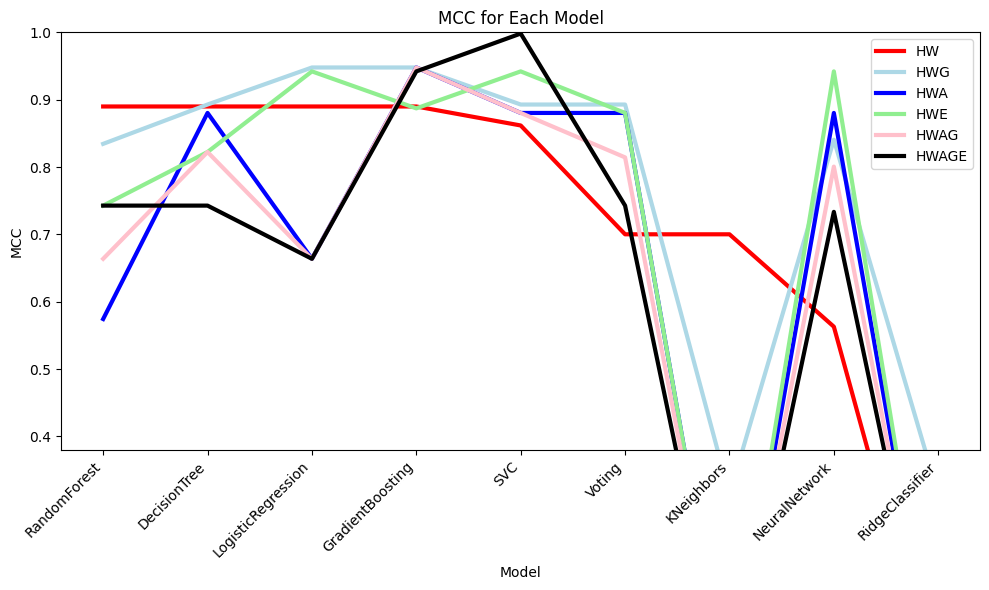

In [16]:
##Optional: Script to create graphical representation after manually creating the input matrix below from the outputs files/screen
import matplotlib.pyplot as plt
import pandas as pd

# Your data
data = {
    'Model': ['RandomForest', 'DecisionTree', 'LogisticRegression', 'GradientBoosting', 'SVC', 'Voting', 'KNeighbors', 'NeuralNetwork', 'RidgeClassifier'],
    'MCC HW': [0.8899, 0.8899, 0.8899, 0.8899, 0.8617, 0.7001, 0.7001, 0.5629, 0.0000],
    'MCC HWA': [0.5743, 0.8803, 0.6637, 0.9478, 0.8803, 0.8803, 0.0000, 0.8803, 0.0000],
    'MCC HWG': [0.8344, 0.8928, 0.9478, 0.9478, 0.8928, 0.8928, 0.3137, 0.8406, 0.3137],
    'MCC HWE': [0.7427, 0.8223, 0.9420, 0.8871, 0.9420, 0.8803, 0.0000, 0.9420, 0.0000],
    'MCC AG': [0.6637, 0.8223, 0.6637, 0.9478, 0.8803, 0.8143, 0.0000, 0.8006, 0.0000],
    'MCC HWAGE': [0.7427, 0.7427, 0.6637, 0.9420, 0.9982, 0.7427, 0.0000, 0.7334, 0.0000]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Model'], df['MCC HW'], linewidth=3, color='red', label='HW')
plt.plot(df['Model'], df['MCC HWG'], linewidth=3, color='lightblue', label='HWG')
plt.plot(df['Model'], df['MCC HWA'], linewidth=3, color='blue', label='HWA')
plt.plot(df['Model'], df['MCC HWE'], linewidth=3, color='lightgreen', label='HWE')
plt.plot(df['Model'], df['MCC AG'], linewidth=3, color='pink', label='HWAG')
plt.plot(df['Model'], df['MCC HWAGE'], linewidth=3, color='black', label='HWAGE')
plt.title('MCC for Each Model')
plt.xlabel('Model')
plt.ylabel('MCC')
plt.ylim(0.38, 1)  # Set the y-axis limit to ensure proper visualization of accuracy values
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.legend()
plt.show()